In [1]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam
#
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)
print("import done")

Using TensorFlow backend.


import done


In [2]:
#https://github.com/debadridtt/A-Review-of-Different-Word-Embeddings-for-Sentiment-Classification-using-Deep-Learning/blob/master/LSTM%20Experiment.ipynb

### Loading the data

In [45]:
import os
DATA_FILE = os.path.abspath('../DATA/DATA.csv')
df = pd.read_csv(DATA_FILE,delimiter=';',encoding='UTF-8')
print(df.head())

                                                text     label
0  I had ordered a data cable, got a very well fi...  NOTISSUE
1                                   Love This Phone.  NOTISSUE
2                I get a very well finished product.  NOTISSUE
3                            I could not be happier.  NOTISSUE
4  I was looking for this headset for a long time...  NOTISSUE


In [46]:
df['label'].value_counts() #balanced Dataset


NOTISSUE    2030
ISSUE       2025
Name: label, dtype: int64

In [47]:
df.shape

(4055, 2)

### Exploratory Data Analysis

C:\Users\khmar\ana\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\khmar\ana\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


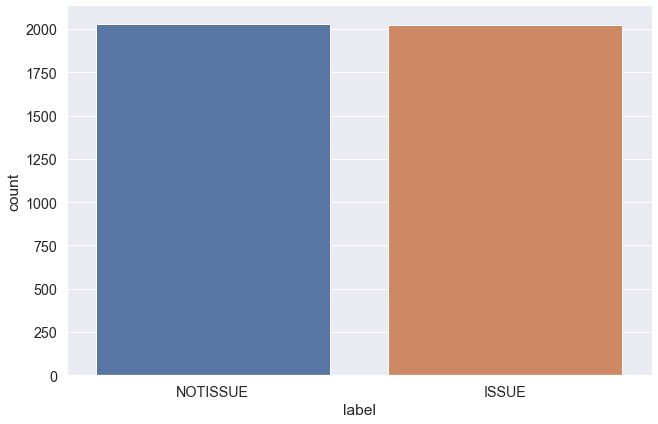

In [48]:
#Target variable
sns.factorplot(x="label", data=df, kind="count", size=6, aspect=1.5)
plt.show();

###  Preprocessing the Data


In [49]:
# List stop words
STOP_WORDS ={
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 #'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 #'became',
 'because',
 #'become',
 #'becomes',
 #'becoming',
 #'been',
 'before',
 'beforehand',
 #'behind',
 #'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 #'call',
 'can',
 'cannot',
 'could',
 'did',
 #'do',
 #'does',
 #'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 #'everything',
 'everywhere',
 'except',
 'few',
 'first',
 'for',
 'former',
 'formerly',
 'from',
 'front',
 'full',
 'further',
 #'had',
 #'has',
 #'have',
 'he',
 'hence',
 'her',
 'here',
 'hereafter',
 'hereby',
 'herein',
 'hereupon',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'however',
 'hundred',
 'i',
 'if',
 'in',
 'indeed',
 'into',
 'is',
 'it',
 'its',
 'itself',
 'just',
 'last',
 'latter',
 'latterly',
 'least',
 'less',
 #'made',
 #'make',
 'many',
 'may',
 'me',
 'meanwhile',
 'might',
 'mine',
 'more',
 'moreover',
 'most',
 'mostly',
 'move',
 'much',
 'must',
 'my',
 'myself',
 'name',
 'namely',
 'neither',
 'nevertheless',
 'next',
 'noone',
 'nor',
 'now',
 'nowhere',
 'of',
 'off',
 'often',
 'on',
 'once',
 'only',
 'onto',
 'or',
 'other',
 'others',
 'otherwise',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'part',
 'per',
 'perhaps',
 'put',
 'quite',
 'rather',
 're',
 'really',
 'regarding',
 'same',
 #'say',
 #'see',
 #'seem',
 #'seemed',
 #'seeming',
 #'seems',
 'serious',
 'several',
 'she',
 'should',
 #'show',
 'side',
 'since',
 'so',
 'some',
 'somehow',
 'someone',
 'something',
 'sometime',
 'sometimes',
 'somewhere',
 'still',
 'such',
 #'take',
 'than',
 'that',
 'the',
 'their',
 'them',
 'themselves',
 'then',
 'thence',
 'there',
 'thereafter',
 'thereby',
 'therefore',
 'therein',
 'thereupon',
 'these',
 'they',
 'third',
 'this',
 'those',
 'though',
 'three',
 'through',
 'throughout',
 'thru',
 'thus',
 'to',
 'together',
 'too',
 'top',
 #'toward',
 #'towards',
 'twelve',
 'under',
 'unless',
 'until',
 'up',
 'upon',
 'us',
 #'used',
 'using',
 'various',
 'very',
 'via',
 'was',
 'we',
 'were',
 'what',
 'whatever',
 'when',
 'whence',
 'whenever',
 'where',
 'whereafter',
 'whereas',
 'whereby',
 'wherein',
 'whereupon',
 'wherever',
 'whether',
 'which',
 'while',
 'whither',
 'who',
 'whoever',
 'whole',
 'whom',
 'whose',
 'why',
 'will',
 'with',
 'within',
 'without',
 'would',
 'yet',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves'}

In [50]:
switcher = {
"couldn't": "could not",
        "couldn": "could not",
        "won't": "will not",
        "won": "will not",
        "mustn't": "must not",
        "mustn": "must not",
        "that'll": "that will",
        "shouldn't": "should not",
        "shouldn": "should not",
        "should've": "should have",
        "haven't": "have not",
        "haven": "have not",
        "hadn't": "have not",
        "hadn": "have not",
        "hasn't": "have not",
        "hasn": "have not",
        "didn't": "do not",
        "didn": "do not",
        "doesn't": "do not",
        "doesn": "do not",
        "don't": "do not",
        "don": "do not", 
        "isn't": "be not",
        "you'd":"you would",
        "you've":"you have",
        "you're":"you are",
        "you'll":"you will",
        "she's":"she is",
        "she'd":"she would",
        "she'll":"she will",
        "he's":"he is",
        "he'd":"he would",
        "he'll":"he will",
        "it's":"it is",
        "it'd":"it would",
        "it'll":"it will",
        "aren't":"are not",
        "aren":"are not",
        "weren't":"were not",
        "weren":"were not",
        "wouldn't":"would not",
        "wouldn":"would not",
        "needn't":"need not",
        "needn":"need not",
        "wasn't":"was not",
        "wasn":"was not",
        "mightn't":"might not",
        "mightn":"might not",
        "shan't":"shall not",
        "shan":"shall not", 
        "can't":"can not",
        "i'm":"i am",
        "i'd":"i would",
        "i'll":"i will",
        "i've":"i have",
        "we're":"we are",
        "we'd":"we would",
        "we'll":"we will",
        "we've":"we have",
        "they're":"they are",
        "they'd":"they would",
        "they'll":"they will",
        "they've":"they have",
        "let's":"let us",
        "how's":"how is",
        "here's":"here is",
        "what's":"what is",
        "there's":"there is",
        'awsm': 'awesome',
        "aamof": "as a matter of fact",
        "abt": "about",
        "abt2": "about to",
        "ac": "air conditioning",
        "ace": "solo winner",
        "ack": "acknowledged",
        "admin": "administrator",
        "thr": "there",
        "frm": "from",
        "aggro": "aggression",
        "agl": "angel",
        "dob": "date of birth",
        "ai": "artificial intelligence",
        "aiic": "as if i care",
        "aka": "also known as",
        "alap": "as long as possible",
        "alol": "actually laughing out loud",
        "ama": "ask me anything",
        "amap": "as much as possible",
        "amazn": "amazing",
        "ammo": "ammunition",
        "ams": "ask me something",
        "anon": "anonymous",
        "asap": "as soon as possible",
        "asat": "as simple as that",
        "awks": "awkward",
        "awl": "always with love",
        "ayk": "as you know",
        "azm": "awesome",
        "b": "be",
        "b&w": "black and white",
        "b-day": "birthday",
        "bday": "birthday",
        "bcoz": "because",
        "bcos": "because",
        "bcz": "because",
        "bf": "boyfriend",
        "btw": "between",
        "b4": "before",
        "bai": "bye",
        "bb": "bye bye",
        "bc": "abuse",
        "mc": "abuse",
        "bcc": "blind carbon copy",
        "bff": "best friends forever",
        "biz": "business",
        "bk": "back",
        "bo": "back off",
        "bro": "brother",
        "btwn": "between",
        "c": "see",
        "char": "character",
        "combo": "combination",
        "cu": "see you",
        "cu2": "see you too",
        "cu2mr": "see you tomorrow",
        "cya": "see ya",
        "cyal8r": "see you later",
        "cyb": "call you back",
        "cye": "check your e-mail",
        "cyf": "check your facebook",
        "cyfb": "check your facebook",
        "cyl": "catch ya later",
        "cym": "check your myspace",
        "cyo": "see you online",
        "d8": "date",
        "da": "the",
        "dece": "decent",
        "ded": "dead",
        "dept": "department",
        "dis": "this",
        "ditto": "same",
        "diva": "rude woman",
        "dk": "don't know",
        "dlm": "don't leave me",
        "dm": "direct message",
        "dnd": "do not disturb",
        "dno": "don't know",
        "dnt": "don't",
        "e1": "everyone",
        "eg": "for example",
        "emc2": "genius",
        "emo": "emotional",
        "enuf": "enough",
        "eod": "end of discussion",
        "eof": "end of file",
        "eom": "end of message",
        "eta": "estimated time of arrival",
        "every1": "everyone",
        "evs": "whatever",
        "exp": "experience",
        "f": "female",
        "f2f": "face to face",
        "f2p": "free to play",
        "f2t": "free to talk",
        "f9": "fine",
        "fab": "fabulous",
        "fail": "failure",
        "faq": "frequently asked questions",
        "fav": "favorite",
        "fave": "favorite",
        "favs": "favorites",
        "fb": "facebook",
        "fbc": "facebook chat",
        "fbf": "facebook friend",
        "fml": "family",
        "fn": "fine",
        "fo": "freaking out",
        "fri": "friday",
        "frnd": "friend",
        "fu": "fuck you",
        "fugly": "fucking ugly",
        "gf": "girlfriend",
        "g1": "good one",
        "g2b": "going to bed",
        "g2cu": "good to see you",
        "g2g": "good to go",
        "g4i": "go for it",
        "g4n": "good for nothing",
        "g4u": "good for you",
        "g9": "goodnight",
        "ga": "go ahead",
        "ge": "good evening",
        "gl": "good luck",
        "gm": "good morning",
        "gn": "goodnight",
        "gonna": "going to",
        "goon": "idiot",
        "gorge": "gorgeous",
        "gr8": "great",
        "grats": "congratulations",
        "gratz": "congratulations",
        "grl": "girl",
        "gt2t": "got time to talk",
        "gtg": "good to go",
        "gud": "good",
        "gv": "give",
        "gvn": "given",
        "gw": "good work",
        "h/o": "hold on",
        "h/p": "hold please",
        "h/t": "hat tip",
        "h/u": "hook up",
        "h2cus": "hope to see you soon",
        "h4u": "hot for you",
        "h4x0r": "hacker",
        "h4x0rz": "hackers",
        "h8": "hate",
        "h8r": "hater",
        "h8t": "hate",
        "ha": "hello again",
        "haha": "laughing",
        "hai": "hi",
        "hak": "hugs and kisses",
        "han": "how about now?",
        "hav": "have",
        "hax": "hacks",
        "haxor": "hacker",
        "hay": "how are you",
        "hb2u": "happy birthday to you",
        "hbbd": "happy belated birthday",
        "hbd": "happy birthday",
        "hc": "how cool",
        "hcit": "how cool is that",
        "hehe": "laughing",
        "hf": "have fun",
        "hi5": "high five",
        "hig": "how's it going?",
        "hih": "hope it helps",
        "ho": "hold on",
        "hoc": "house of cards",
        "hof": "hall of fame",
        "holla": "holler",
        "hom": "hit or miss",
        "hood": "neighborhood",
        "hoops": "basketball",
        "hottie": "attractive person",
        "hr": "human resources",
        "hru": "how are you",
        "hry": "hurry",
        "hubby": "husband",
        "hwk": "homework",
        "hwp": "height weight proportionate",
        "hwu": "hey, what's up?",
        "hxc": "hardcore",
        "h^": "hook up",
        "i8": "i ate",
        "i8u": "i hate you",
        "ia": "i agree",
        "iab": "in a bit",
        "iac": "in any case",
        "iad": "it all depends",
        "iae": "in any event",
        "iag": "it's all good",
        "iagw": "in a good way",
        "iail": "i am in love",
        "iam": "in a minute",
        "ic": "i see",
        "id10t": "idiot",
        "idc": "i don't care",
        "idd": "indeed",
        "idi": "i doubt it",
        "idk": "i don't know",
        "idky": "i don't know why",
        "idmb": "i'll do my best",
        "idn": "i don't know",
        "idnk": "i do not know",
        "idr": "i don't remember",
        "idt": "i don't think",
        "idts": "i don't think so",
        "idtt": "i'll drink to that",
        "idu": "i don't understand",
        "ie": "that is",
        "ig2p": "i got to pee",
        "iggy": "ignored",
        "ight": "alright",
        "igi": "i get it",
        "ign": "in-game name",
        "igtp": "i get the point",
        "ih8u": "i hate you",
        "ihu": "i hate you",
        "ihy": "i hate you",
        "ii": "i'm impressed",
        "iiok": "if i only knew",
        "iir": "if i remember",
        "iirc": "if i remember correctly",
        "iit": "i'm impressed too",
        "iiuc": "if i understand correctly",
        "ik": "i know",
        "ikhyf": "i know how you feel",
        "ikr": "i know, right?",
        "ikwum": "i know what you mean",
        "ikwym": "i know what you mean",
        "ikyd": "i know you did",
        "ilu": "i like you",
        "ilu2": "i love you too",
        "ilub": "i love you baby",
        "ilyk": "i'll let you know",
        "ilyl": "i love you lots",
        "ilysm": "i love you so much",
        "ima": "i'm",
        "imma": "i'm gonna",
        "imo": "in my opinion",
        "imy": "i miss you",
        "inb4": "in before",
        "inc": "incoming",
        "indie": "independent",
        "info": "information",
        "init": "initialize",
        "ipo": "initial public offering",
        "ir": "in room",
        "ir8": "irate",
        "irdk": "i really don't know",
        "irl": "in real life",
        "iyo": "in your opinion",
        "iyq": "i like you",
        "j/k": "just kidding",
        "j/p": "just playing",
        "j/w": "just wondering",
        "j2lyk": "just to let you know",
        "j4f": "just for fun",
        "j4g": "just for grins",
        "jas": "just a second",
        "jb/c": "just because",
        "joshing": "joking",
        "k": "ok",
        "k3u": "i love you",
        "kappa": "sarcasm",
        "kek": "korean laugh",
        "keke": "korean laugh",
        "kewl": "cool",
        "kewt": "cute",
        "kfc": "kentucky fried chicken",
        "kgo": "ok, go",
        "kik": "laughing out loud",
        "kinda": "kind of",
        "kk": "ok",
        "kl": "kool",
        "km": "kiss me",
        "kma": "kiss my ass",
        "knp": "ok, no problem",
        "kw": "know",
        "kwl": "cool",
        "l2m": "listening to music",
        "l2p": "learn to play",
        "l33t": "leet",
        "l8": "late",
        "l8er": "later",
        "l8r": "later",
        "la": "laughing a lot",
        "laf": "laugh",
        "laffing": "laughing",
        "lafs": "love at first sight",
        "lam": "leave a message",
        "lamer": "lame person",
        "legit": "legitimate",
        "lemeno": "let me know",
        "lil": "little",
        "lk": "like",
        "llol": "literally laughing out loud",
        "lmho": "laughing my head off",
        "loi": "laughing on the inside",
        "lola": "love often, laugh a lot",
        "lolol": "lots of laugh out louds",
        "lolz": "laugh out louds",
        "ltr": "later",
        "lulz": "lol",
        "luv": "love",
        "luzr": "loser",
        "lv": "love",
        "ly": "love ya",
        "lya": "love you always",
        "lyk": "let you know",
        "lyn": "lying",
        "lysm": "love you so much",
        "m": "male",
        "mcd": "mcdonald's",
        "mcds": "mcdonald's",
        "md@u": "mad at you",
        "me2": "me too",
        "meh": "whatever",
        "mf": "mother fucker",
        "mfb": "mother fucking bitch",
        "mgmt": "management",
        "mid": "middle",
        "mil": "mother-in-law",
        "min": "minute",
        "mins": "minutes",
        "mk": "okay",
        "mkay": "ok",
        "mmk": "ok",
        "mms": "multimedia messaging service",
        "mng": "manage",
        "mngr": "manager",
        "mod": "modification",
        "mofo": "mother fucking",
        "mojo": "attractive talent",
        "moss": "chill",
        "ms": "miss",
        "msg": "message",
        "mtg": "meeting",
        "mth": "month",
        "mu": "miss you",
        "mu@": "meet you at",
        "muah": "kiss",
        "mula": "money",
        "mwa": "kiss",
        "mwah": "kiss",
        "n/m": "nevermind",
        "n/m/h": "nothing much here",
        "n/r": "no reserve",
        "n00b": "newbie",
        "n1": "nice one",
        "n1c": "no one cares",
        "n2m": "not too much",
        "n2mh": "not too much here",
        "n2w": "not to worry",
        "n64": "nintendo 64",
        "n8kd": "naked",
        "nac": "not a chance",
        "nah": "no",
        "nal": "nationality",
        "narc": "tattle tale",
        "nark": "informant",
        "naw": "no",
        "nb": "not bad",
        "nbd": "no big deal",
        "nbjf": "no brag, just fact",
        "nd": "and",
        "ne": "any",
        "ne1": "anyone",
        "ne1er": "anyone here",
        "neh": "no",
        "nemore": "anymore",
        "neva": "never",
        "neway": "anyway",
        "newaze": "anyways",
        "newb": "newbie",
        "nite": "night",
        "nn2r": "no need to reply",
        "nnito": "not necessarily in that order",
        "nnto": "no need to open",
        "nntr": "no need to reply",
        "no1": "no one",
        "noob": "newbie",
        "nooblet": "young newbie",
        "nooblord": "ultimate newbie",
        "notch": "minecraft creator",
        "nottie": "unattractive person",
        "np": "no problem",
        "nub": "newbie",
        "nuff": "enough",
        "nufn": "nothing",
        "num": "tasty",
        "nvm": "nevermind",
        "nvr": "never",
        "nvrm": "nevermind",
        "nw": "no way",
        "nxt": "next",
        "o4u": "only for you",
        "obtw": "oh, by the way",
        "obv": "obviously",
        "obvi": "obviously",
        "oc": "of course",
        "ohemgee": "oh my gosh",
        "oic": "oh, i see",
        "oicn": "oh, i see now",
        "oiy": "hi",
        "omg": "oh my god",
        "onl": "online",
        "onoz": "oh no",
        "orly": "oh really",
        "otay": "okay",
        "otw": "on the way",
        "outta": "out of",
        "ovie": "overlord",
        "ownage": "completely owned",
        "p/d": "per day",
        "p/m": "per month",
        "p/y": "per year",
        "p911": "parent alert!",
        "p@h": "parents at home",
        "pc": "personal computer",
        "pda": "public display of affection",
        "pic": "picture",
        "pj": "poor joke",
        "pl8": "plate",
        "pld": "played",
        "pls": "please",
        "plz": "please",
        "plzrd": "please read",
        "pov": "point of view",
        "ppl": "people",
        "ppp": "peace",
        "prof": "professor",
        "prolly": "probably",
        "promo": "promotion",
        "props": "recognition",
        "prot": "protection",
        "prvt": "private",
        "ps": "postscript",
        "ps2": "playstation 2",
        "ps3": "playstation 3",
        "psa": "public service announcement",
        "psog": "pure stroke of genius",
        "psp": "playstation portable",
        "ptm": "please tell me",
        "pwd": "password",
        "psd": "password",
        "pswd": "password",
        "pwnd": "owned",
        "pwned": "owned",
        "pwnt": "owned",
        "q4u": "question for you",
        "qfe": "quoted for emphasis",
        "qft": "quoted for truth",
        "qq": "quick question",
        "qqn": "looking",
        "qrg": "quick reference guide",
        "qt": "cutie",
        "qtpi": "cutie pie",
        "r": "are",
        "r8": "rate",
        "rdy": "ready",
        "re": "replay",
        "rehi": "hi again",
        "rents": "parents",
        "rep": "reputation",
        "resq": "rescue",
        "rgd": "regard",
        "rgds": "regards",
        "ridic": "ridiculous",
        "rip": "rest in peace",
        "rl": "real life",
        "rlrt": "real life retweet",
        "rly": "really",
        "rm": "room",
        "rn": "run",
        "rnt": "aren't",
        "rof": "laughing",
        "rofl": "laughing",
        "roflmao": "laughing",
        "roflol": "laughing out loud",
        "rolf": "laughing",
        "ru": "are you",
        "ruc": "are you coming?",
        "rut": "are you there?",
        "rx": "prescription",
        "s/o": "sold out",
        "s/u": "shut up",
        "s/w": "software",
        "s2r": "send to receive",
        "s2s": "sorry to say",
        "s2u": "same to you",
        "samzd": "still amazed",
        "sd": "sweet dreams",
        "sec": "second",
        "sho": "sure",
        "sh^": "shut up",
        "siul8r": "see you later",
        "siv": "bad goaltender",
        "sk8": "skate",
        "sk8r": "skater",
        "sly": "still love you",
        "smf": "so much fun",
        "smooch": "kiss",
        "sorta": "sort of",
        "spec": "specialization",
        "spk": "speak",
        "spkr": "speaker",
        "srry": "sorry",
        "srs": "serious",
        "srsly": "seriously",
        "sry": "sorry",
        "stpd": "stupid",
        "str": "strength",
        "str8": "straight",
        "sup": "what's up",
        "syl": "see you later",
        "sync": "synchronize",
        "t2go": "time to go",
        "t2m": "talk to me",
        "t2u": "talk to you",
        "t2ul": "talk to you later",
        "t2ul8er": "talk to you later",
        "t2ul8r": "talk to you later",
        "t4lmk": "thanks for letting me know",
        "t4p": "thanks for posting",
        "t4t": "thanks for trade",
        "tc": "take care",
        "teh": "the",
        "teme": "tell me",
        "tg": "thank goodness",
        "thnq": "thank you",
        "tho": "though",
        "thru": "through",
        "tht": "that",
        "thx": "thanks",
        "tl": "tell",
        "tlk": "talk",
        "tlkin": "talking",
        "tlking": "talking",
        "tomoz": "tomorrow",
        "tq": "thank you",
        "tqvm": "thank you very much",
        "tru": "true",
        "ttl": "talk to you later",
        "ttly": "totally",
        "ttul": "talk to you later",
        "tty": "talk to you",
        "tu": "thank you",
        "tude": "attitude",
        "tx": "thanks",
        "txt": "text",
        "txtin": "texting",
        "ty": "thank you",
        "tyfa": "thank you for asking",
        "tyl": "thank you lord",
        "tym": "thank you much",
        "tyt": "take your time",
        "tyvm": "thank you very much",
        "u": "you",
        "u-ok": "you ok?",
        "u/l": "upload",
        "u2": "you too",
        "u2u": "up to you",
        "uok": "you ok?",
        "ur": "your",
        "ut": "you there?",
        "veggies": "vegetables",
        "vry": "very",
        "vs": "versus",
        "w/": "with",
        "w/b": "welcome back",
        "w/e": "whatever",
        "w/o": "without",
        "w2f": "way too funny",
        "w2g": "way to go",
        "w2k": "windows 2000",
        "w4u": "wait for you",
        "w8": "wait",
        "w84m": "wait for me",
        "w8am": "wait a minute",
        "w8ing": "waiting",
        "w8n": "waiting",
        "wa": "what",
        "waa": "crying",
        "wack": "strange",
        "wan2": "want to",
        "wannabe": "want to be",
        "wat": "what",
        "watev": "whatever",
        "watevs": "whatever",
        "wlcm": "welcome",
        "wha": "what",
        "whipped": "tired",
        "wht": "what",
        "wk": "week",
        "wknd": "weekend",
        "wtf": "what the fuck",
        "wtg": "way to go",
        "wup": "what's up?",
        "ya": "yes",
        "yeap": "yes",
        "yep": "yes",
        "yepperz": "yes",
        "yesh": "yes",
        "yo": "hi",
        "yr": "your",
        "yrs": "years",
        "yt": "you there?",
        "yt?": "you there?",
        "yup": "yes",
        "yupz": "ok",
        "zzz": "sleeping",
        "ain't": "is not", "aren't": "are not","can't": "cannot", 
        "can't've": "cannot have", "'cause": "because", "could've": "could have", 
        "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
        "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
        "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
        "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
        "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
        "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
        "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
        "I'll've": "I will have","I'm": "I am", "I've": "I have", 
        "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
        "i'll've": "i will have","i'm": "i am", "i've": "i have", 
        "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
        "it'll": "it will", "it'll've": "it will have","it's": "it is", 
        "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
        "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
        "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
        "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                    "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have"
}


In [51]:
import nltk
import inflect
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import parsing
from gensim.parsing.preprocessing import split_alphanum
from spellchecker import SpellChecker
import re

In [52]:
"""def replace_word(word):
    # Convert text to lower
    word = word.lower()
    word = word.split()
    for i in range(len(word)):
        word[i] = switcher.get(word[i], word[i])
    word = " ".join(word)
    return word

def transformText(text):
    text = split_alphanum(text)
    # Convert text to lower
    text = text.lower()
    text = replace_word(text)
    #stops = set(stopwords.words("english"))

    # Removing non ASCII chars    
    text = re.sub(r'[^\x00-\x7f]',r' ',text)
    
    # Removing all the tokens with lesser than 3 characters
    #text = gensim.corpora.textcorpus.remove_short(text, minsize=3)
    
    # Strip all the numerics
    #text = gensim.parsing.preprocessing.strip_numeric(text)
    
    # Removing all the stopwords
    filtered_words = [word for word in text.split() if word not in STOP_WORDS]
    
    # Preprocessed text after stop words removal
    text = " ".join(filtered_words)
    
    # Remove the punctuation
    text = gensim.parsing.preprocessing.strip_punctuation2(text)
    
    # remove html markup
    text = re.sub("(<.*?>)","",text)
    
    
    # Correct words
    spell = SpellChecker()
    misspelled = text.split()
    wordnet_lemmatizer = WordNetLemmatizer()
    for i in range(len(misspelled)):
        # Get the one `most likely` answer
        word = spell.correction(misspelled[i])
        misspelled[i]=word
        
        ##### Lemmatization
        # Reduce words to their root form
        # Lemmatize verbs by specifying pos
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="v")
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="n")
    text = " ".join(misspelled)
    
    # Strip multiple whitespaces
    text = gensim.corpora.textcorpus.strip_multiple_whitespaces(text)
    return text"""

'def replace_word(word):\n    # Convert text to lower\n    word = word.lower()\n    word = word.split()\n    for i in range(len(word)):\n        word[i] = switcher.get(word[i], word[i])\n    word = " ".join(word)\n    return word\n\ndef transformText(text):\n    text = split_alphanum(text)\n    # Convert text to lower\n    text = text.lower()\n    text = replace_word(text)\n    #stops = set(stopwords.words("english"))\n\n    # Removing non ASCII chars    \n    text = re.sub(r\'[^\x00-\x7f]\',r\' \',text)\n    \n    # Removing all the tokens with lesser than 3 characters\n    #text = gensim.corpora.textcorpus.remove_short(text, minsize=3)\n    \n    # Strip all the numerics\n    #text = gensim.parsing.preprocessing.strip_numeric(text)\n    \n    # Removing all the stopwords\n    filtered_words = [word for word in text.split() if word not in STOP_WORDS]\n    \n    # Preprocessed text after stop words removal\n    text = " ".join(filtered_words)\n    \n    # Remove the punctuation\n    te

In [53]:
def replace_word(word):
    word = word.lower()
    word = word.split()
    for i in range(len(word)):
        word[i] = switcher.get(word[i], word[i])
    word = " ".join(word)
    return word

##Fixing Word Lengthening
##https://rustyonrampa"ge.github.io/text-mining/2017/11/28/spelling-correction-with-python-and-nltk.html
def reduce_lengthening(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

def replace_numbers(word):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    word = word.split()
    for i in range(len(word)):
        if word[i].isdigit():
            word[i] = p.number_to_words(word[i])
    word = " ".join(word)
    return word
def transformText(text):
    text = split_alphanum(text)
    # Convert text to lower
    text = text.lower()
    text = replace_word(text)
    text = replace_numbers(text)
    text = reduce_lengthening(text)
    # Removing non ASCII chars    
    text = re.sub(r'[^\x00-\x7f]',r' ',text)
    # Removing all the stopwords
    filtered_words = [word for word in text.split() if word not in STOP_WORDS]
    # Preprocessed text after stop words removal
    text = " ".join(filtered_words)
    # Remove the punctuation
    text = gensim.parsing.preprocessing.strip_punctuation2(text)
    # remove html markup
    text = re.sub("(<.*?>)","",text)
    # Correct words
    spell = SpellChecker()
    misspelled = text.split()
    wordnet_lemmatizer = WordNetLemmatizer()
    for i in range(len(misspelled)):
        # Get the one `most likely` answer
        word = spell.correction(misspelled[i])
        misspelled[i]=word
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="v")
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="n")
    text = " ".join(misspelled)
    
    # Strip multiple whitespaces
    text = gensim.corpora.textcorpus.strip_multiple_whitespaces(text)
    # Strip all the numerics
    #text = gensim.parsing.preprocessing.strip_numeric(text)
    return text

In [54]:
transformText(" she'd've I have so 20000 soooooo don't i'm  can't servic going grooooooooop")

'have have twenty thousand soo do not be service go group'

In [55]:
df['text'] = df['text'].map(lambda x: transformText(x))

In [56]:
#df=df[texts,tags]

In [57]:
texts= df['text']
tags= df['label']

In [58]:
df=df[texts,tags]

TypeError: '(0       have order data cable get well finish work pro...
1                                              love phone
2                                 get well finish product
3                                          not be happier
4                         look headset long time have get
5                            headset start ring no reason
6                      display excellent camera good year
7                                      battery life great
8                        worst phone have have have month
9       not good item work start have problem auto rev...
10               embarrass ear hurt try push ear plug ear
11                                     protect phone side
12      average phone bad battery life operate weak ne...
13           clear skye call long battery life long range
14                                   solo technology suck
15                                 great hand free device
16       take self portrait outside exterior display cool
17                                   problem have mention
18             try handsfree gadget one finally work well
19                                           magical help
20              worst piece crap version customer service
21                                     poor sound quality
22                                      best phone market
23                                              work well
24                company ship product promptly work well
25                                           exactly want
26      picture resolution far comparably price phone ...
27                                             great deal
28                  excellent product be satisfy purchase
29             highly recommend encourage people give try
                              ...                        
4025                     flair bartender absolutely amaze
4026                    freeze margarita way sugary taste
4027                                     good order twice
4028    nutshell 1 restaurant smell like combination d...
4029                                  girlfriend veal bad
4030                               unfortunately not good
4031                       have pretty satisfy experience
4032                    join club get awesome offer email
4033            perfect me like beer ice cold case colder
4034    bland flavourless good way describe barely tep...
4035                 chain be no fan of beat place easily
4036                                           nacho have
4037                                     not be come back
4038    do nothave word say place do everything pretty...
4039    staff super nice quick crazy crowd downtown ju...
4040               great atmosphere friendly fast service
4041          receive pity huge have lot meat thumb there
4042                                       food arrive me
4043    pay 7 85 hot dog fry look like come kid meal w...
4044                 classic maine lobster roll fantastic
4045    brother law work mall eat day guess sick night...
4046                   good be go have review place twice
4047                          chip salsa good salsa fresh
4048                                          place great
4049                                        mediocre food
4050                          get inside be impress place
4051                               service super friendly
4052                        sad little vegetable overcook
4053                                  place nice surprise
4054                              live music totally blow
Name: text, Length: 4055, dtype: object, 0       NOTISSUE
1       NOTISSUE
2       NOTISSUE
3       NOTISSUE
4       NOTISSUE
5          ISSUE
6       NOTISSUE
7       NOTISSUE
8          ISSUE
9          ISSUE
10         ISSUE
11      NOTISSUE
12         ISSUE
13      NOTISSUE
14         ISSUE
15      NOTISSUE
16      NOTISSUE
17         ISSUE
18      NOTISSUE
19      NOTISSUE
20         ISSUE
21         ISSUE
22      NOTISSUE
23      NOTISSUE
24      NOTISSUE
25      NOTISSUE
26         ISSUE
27      NOTISSUE
28      NOTISSUE
29      NOTISSUE
          ...   
4025    NOTISSUE
4026       ISSUE
4027    NOTISSUE
4028       ISSUE
4029       ISSUE
4030       ISSUE
4031    NOTISSUE
4032    NOTISSUE
4033    NOTISSUE
4034       ISSUE
4035       ISSUE
4036    NOTISSUE
4037       ISSUE
4038    NOTISSUE
4039    NOTISSUE
4040    NOTISSUE
4041    NOTISSUE
4042       ISSUE
4043       ISSUE
4044    NOTISSUE
4045       ISSUE
4046    NOTISSUE
4047    NOTISSUE
4048    NOTISSUE
4049       ISSUE
4050    NOTISSUE
4051    NOTISSUE
4052       ISSUE
4053    NOTISSUE
4054    NOTISSUE
Name: label, Length: 4055, dtype: object)' is an invalid key

In [59]:
# saving the dataframe 
df.to_csv('../Data/DATA_preprocessing811.csv')
df.head()

,text,label
0,have order data cable get well finish work pro...,NOTISSUE
1,love phone,NOTISSUE
2,get well finish product,NOTISSUE
3,not be happier,NOTISSUE
4,look headset long time have get,NOTISSUE


In [60]:
"""# dictionary of lists  
dict = {'text': texts , 'label': tags } 
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('Data/DATA_preprocessing811.csv')"""

"# dictionary of lists  \ndict = {'text': texts , 'label': tags } \n     \ndf = pd.DataFrame(dict) \n  \n# saving the dataframe \ndf.to_csv('Data/DATA_preprocessing811.csv')"

In [61]:
####

In [62]:
DATA_FILE = '../Data/DATA_preprocessing811.csv'
df = pd.read_csv(DATA_FILE,delimiter=',',encoding='UTF-8')
df.head()

,Unnamed: 0,text,label
0,0,have order data cable get well finish work pro...,NOTISSUE
1,1,love phone,NOTISSUE
2,2,get well finish product,NOTISSUE
3,3,not be happier,NOTISSUE
4,4,look headset long time have get,NOTISSUE


In [63]:
msk = np.random.rand(len(df)) < 0.7 # Splitting into train(70%) and test(30%) randomly

In [64]:
train_df=df[msk]
test_df=df[~msk]

In [65]:
print(train_df.shape)
print(test_df.shape)

(2849, 3)
(1206, 3)


In [66]:
print('Checking target values for train data:\n')
print(train_df['label'].value_counts(),'\n')
print('Checking target values for test data:\n')
print(test_df['label'].value_counts())

Checking target values for train data:

NOTISSUE    1429
ISSUE       1420
Name: label, dtype: int64 

Checking target values for test data:

ISSUE       605
NOTISSUE    601
Name: label, dtype: int64


In [67]:
train_df['label'].value_counts()


NOTISSUE    1429
ISSUE       1420
Name: label, dtype: int64

In [68]:
x_train=train_df['text']
y_train=train_df['label']
x_test=test_df['text']
y_test=test_df['label']

### GLOVE EMBEDDING 300

In [69]:
MAX_NB_WORDS = 20000
MAX_SEQUENCE_LENGTH = 200
maxlen = 120  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

In [70]:
texts_train = x_train.astype(str)
texts_test = x_test.astype(str)

In [71]:
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

C:\Users\khmar\ana\lib\site-packages\keras_preprocessing\text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [72]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, 
                     padding="pre", truncating="post")
test_data = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH, padding="pre",
                          truncating="post")

In [73]:
print('Shape of data tensor:', data.shape)
print('Shape of test_data tensor:', test_data.shape)

Shape of data tensor: (2849, 200)
Shape of test_data tensor: (1206, 200)


In [74]:
import pickle
file_tok = 'LSTM_token_glove_300d_DATA_wit_text_processing.sav'
pickle.dump(tokenizer, open(file_tok, 'wb'))

In [75]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 3182 unique tokens.


In [76]:
#pad sequences are used to bring all sentences to same size.
# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (2849, 200)
Shape of data test tensor: (1206, 200)


In [77]:
y_train = y_train.map({"NOTISSUE": 1, "ISSUE" : 0 })
y_test = y_test.map({"NOTISSUE": 1, "ISSUE" : 0 })

In [78]:
# load the whole embedding into memory
embeddings_index = {}
f = open('C:/Users/khmar/Desktop/GLOVE/glove.6B.300d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [79]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))
#Found 1489 unique tokens : word_index
#print(len(word_index) + 1) #### 1490 
#print(word_index.items()) ### unique tokens : words :word_index
#print('embedding_matrix',embedding_matrix)
out_of_vocab={}
for word, i in word_index.items():
    #print(i)
    embedding_vector = embeddings_index.get(word)
    #print('embedding_vector' ,embedding_vector )
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        #print('word: ', word)
        embedding_matrix[i] = embedding_vector
        #print('embedding_matrix :',embedding_matrix[i] )
        # words not found in embedding index will be all-zeros.
    if embedding_vector is  None:
        print('word not found :',word)
        out_of_vocab[i] = word
            

word not found : notwaste
word not found : nothave
word not found : notknow
word not found : overprice
word not found : notrecommend
word not found : notwait
word not found : flavourful
word not found : notbother
word not found : notunderstand
word not found : notexpect
word not found : notwant
word not found : nothelp
word not found : notregret
word not found : notsave
word not found : notconvert
word not found : appal
word not found : nothelpful
word not found : cosiness
word not found : notskimp
word not found : shawarrma
word not found : profiterole
word not found : cheesecurds
word not found : smashburger
word not found : ciob
word not found : flavourless
word not found : accessoryone
word not found : barset
word not found : plantronincs
word not found : notproduce
word not found : flipphones
word not found : notupload
word not found : notseem
word not found : notslide
word not found : tracfonewebsite
word not found : 5320
word not found : reoccure
word not found : 8125
word not f

In [80]:
f'There are {len(out_of_vocab)} out of vocab '

'There are 75 out of vocab '

In [33]:

model_glove= Sequential()
model_glove.add(Embedding(len(word_index) + 1,
                            300,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False))
model_glove.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,input_shape=(1,)))
model_glove.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [34]:
model_glove.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
model_glove.fit(data, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(test_data, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 2848 samples, validate on 1208 samples
Epoch 1/2
2848/2848 [==============================] - 27s 9ms/step - loss: 0.5300 - acc: 0.7384 - val_loss: 0.4211 - val_acc: 0.8253
Epoch 2/2
2848/2848 [==============================] - 23s 8ms/step - loss: 0.4235 - acc: 0.8097 - val_loss: 0.3970 - val_acc: 0.8262


In [36]:
scores = model_glove.evaluate(x_test, y_test,
                            batch_size=batch_size)
print("%s: %.2f%%" % (model_glove.metrics_names[0], scores[0] * 100))
print("%s: %.2f%%" % (model_glove.metrics_names[1], scores[1] * 100))

1208/1208 [==============================] - 2s 2ms/step
loss: 39.70%
acc: 82.62%


In [37]:
# Save the model
model_glove.save('Model/LSTM_model_glove_300_DATA_with_text_processing_v7.sav')

### Prediction

In [38]:
##one text prediction!

In [40]:
def prediction(input_file,output_file):
    df= pd.DataFrame(columns=['label', 'text'])
    data = pd.read_csv(input_file,delimiter=',')
    inputt=data.text
    x_input = inputt.values
    ind=0
    for i in x_input:
        ind=ind+1
        text=np.array([i])
        seq= tokenizer.texts_to_sequences(text)
        sequences_matrix = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
        proba = model_glove.predict(sequences_matrix)
        class_pred = model_glove.predict_classes(sequences_matrix)
        classe=prediction_classe(class_pred)
        print(ind,i,proba,classe)
        df=df.append({'label':classe, 'text':i},ignore_index=True)
    df.to_csv(output_file,sep=';')
    return data,df

def prediction_classe(class_pred):
    if class_pred==0 :
        classe='ISSUE' 
    if class_pred==1 :
        classe='NOTISSUE'

    return classe

In [41]:
text="great product"
text=transformText(text)
text=np.array([text])
sequences= tokenizer.texts_to_sequences(text)
sequences_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
proba = model_glove.predict(sequences_matrix)
print(proba)
class_pred = model_glove.predict_classes(sequences_matrix)
print(prediction_classe(class_pred))

[[0.94555664]]
NOTISSUE


In [42]:
text="I have a problem can you help me"
text=transformText(text)
text=np.array([text])
sequences= tokenizer.texts_to_sequences(text)
sequences_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
proba = model_glove.predict(sequences_matrix)
print(proba)
class_pred = model_glove.predict_classes(sequences_matrix)
print(prediction_classe(class_pred))

[[0.35531217]]
ISSUE


In [43]:
text=" very recommend"
text=transformText(text)
print(text)
text=np.array([text])
sequences= tokenizer.texts_to_sequences(text)
sequences_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
proba = model_glove.predict(sequences_matrix)
print(proba)
class_pred = model_glove.predict_classes(sequences_matrix)
print(prediction_classe(class_pred))

recommend
[[0.70841813]]
NOTISSUE


In [ ]:
#predict all data

In [44]:
input_file ='DATA/DATA_preprocessing5.csv'
output_file ='Model/LSTM_data_pred_glove_300_with_text_v8.csv'
prediction(input_file,output_file)

1 have order data cable get well finish work product [[0.3949294]] ISSUE
2 love phone [[0.8820797]] NOTISSUE
3 get well finish product [[0.6263053]] NOTISSUE
4 not be happier [[0.35844105]] ISSUE
5 look headset long time have get [[0.40304402]] ISSUE
6 headset start ring no reason [[0.1593405]] ISSUE
7 display excellent camera good year [[0.99804723]] NOTISSUE
8 battery life great [[0.97142076]] NOTISSUE
9 worst phone have have have month [[0.24980655]] ISSUE
10 not good item work start have problem auto reverse tape player [[0.1436429]] ISSUE
11 embarrass ear hurt try push ear plug ear [[0.13809754]] ISSUE
12 protect phone side [[0.5932588]] NOTISSUE
13 average phone bad battery life operate weak network [[0.07464383]] ISSUE
14 clear skye call long battery life long range [[0.69646585]] NOTISSUE
15 solo technology suck [[0.4033431]] ISSUE
16 great hand free device [[0.9805797]] NOTISSUE
17 take self portrait outside exterior display cool [[0.5721068]] NOTISSUE
18 problem have mention 

140 holster arrive not match photo ad [[0.16961412]] ISSUE
141 great no problem all [[0.55049545]] NOTISSUE
142 earlier review note plug charger nothing happen [[0.20535578]] ISSUE
143 frog phone charm adorable eye catch [[0.86596304]] NOTISSUE
144 never know push hard right number time function want not [[0.21613982]] ISSUE
145 sound clear people talk amaze quality too [[0.21052615]] ISSUE
146 get aluminum case new palm v work well it have protect handheld perfectly far [[0.7988916]] NOTISSUE
147 good product well make [[0.96015924]] NOTISSUE
148 mobile phone tool have [[0.87276745]] NOTISSUE
149 be impress job motorola steadiness phone [[0.50260824]] NOTISSUE
150 receive order well ship timeframe everything good work order overall be excite have source [[0.5026014]] NOTISSUE
151 phone sturdy waterproof [[0.7434786]] NOTISSUE
152 be not impress not recommend item anyone [[0.10815013]] ISSUE
153 complaint standard sound volume little low turn 5 of 5 [[0.12336633]] ISSUE
154 thank again

274 not software do great job this make intone form exist cd internet connection [[0.37690648]] ISSUE
275 im surprise good quality car charger not review it [[0.73757637]] NOTISSUE
276 fabulous [[0.88472885]] NOTISSUE
277 however bt headset currently not good real time game like first person shooter audio delay mess up [[0.04417535]] ISSUE
278 price cable excellent [[0.9414268]] NOTISSUE
279 disappoint accessory good manufacturer [[0.50935936]] NOTISSUE
280 perform awful muffle tinny incoming sound severe echo end call [[0.13369654]] ISSUE
281 wind resistant [[0.44318953]] ISSUE
282 obviously have terrible customer service get pay for [[0.1857821]] ISSUE
283 do not forever [[0.15838362]] ISSUE
284 it not overly expensive replace [[0.11798496]] ISSUE
285 easy operate sound better have try [[0.7788001]] NOTISSUE
286 contact company tell that unit warranty not produce receipt luck [[0.0950902]] ISSUE
287 link have way exchange bad phone return unit something [[0.15233313]] ISSUE
288 phone

402 not recommend [[0.40231395]] ISSUE
403 have be year carry highest quality anti glare screen protector have find date [[0.44941646]] ISSUE
404 want [[0.5312722]] NOTISSUE
405 particular model not work motorola q smartphone [[0.42429322]] ISSUE
406 wont work right at least me [[0.305164]] ISSUE
407 addition feel amp look phone lightweight cheap plastic [[0.5591605]] NOTISSUE
408 out warranty problem reoccure bottom line money else singular not support it [[0.11535634]] ISSUE
409 want plantronics five ten be right one have issue me the good [[0.55281264]] NOTISSUE
410 crisp clear [[0.69027793]] NOTISSUE
411 charge keep go dead minute [[0.11799975]] ISSUE
412 cheap plastic creak like old wooden floor [[0.29258272]] ISSUE
413 get absolutely horrible reception apartment phone have not have problem [[0.17505597]] ISSUE
414 reception have be generally good [[0.6792341]] NOTISSUE
415 excellent sound battery life inconspicuous boot [[0.9893104]] NOTISSUE
416 great bluetooth [[0.96749955]] NO

544 stupid that [[0.09577065]] ISSUE
545 hear be drive car usually do steven have loudest set [[0.24876127]] ISSUE
546 seller ship quickly cheaper competitor [[0.37557456]] ISSUE
547 good show samsung [[0.9348444]] NOTISSUE
548 buy ten save a lot money [[0.48089227]] ISSUE
549 cut make beep beep beep sound say signal fail [[0.05728637]] ISSUE
550 configure [[0.49516886]] ISSUE
551 phone sound ok not great ok wife phone totally unintelligible not understand word be say it [[0.11512429]] ISSUE
552 have take battery phone back restart it [[0.3347798]] ISSUE
553 manage bend leaf spring back place metal have stress break drop [[0.20147473]] ISSUE
554 leopard print wonderfully wild [[0.9394493]] NOTISSUE
555 work me [[0.62123215]] NOTISSUE
556 saggy floppy piece junk [[0.19318923]] ISSUE
557 better hard plastic case [[0.5665973]] NOTISSUE
558 have new problem [[0.42907572]] ISSUE
559 happy far [[0.77308303]] NOTISSUE
560 cool phone [[0.73141474]] NOTISSUE
561 work good [[0.8707025]] NOTISSUE

698 do not send receipt [[0.09940401]] ISSUE
699 receipt get copy invoice not format print correctly [[0.15660678]] ISSUE
700 disturb people suppose be account expert [[0.19253796]] ISSUE
701 start look alternative intuit obviously do not understand basic account audit principle [[0.12241268]] ISSUE
702 thoroughly disappoint [[0.20240945]] ISSUE
703 be not do business company anymore give bad support [[0.04165268]] ISSUE
704 online information exactly have cd [[0.6676489]] NOTISSUE
705 have not send coupon [[0.22366765]] ISSUE
706 bad [[0.06789389]] ISSUE
707 save money do not subscribe extend service [[0.11391514]] ISSUE
708 use customer service technical support give answer vaguely relate problem [[0.25848037]] ISSUE
709 be emailinc time get nowhere [[0.19804542]] ISSUE
710 largest technical software company world [[0.5927935]] NOTISSUE
711 have no technical support [[0.23954184]] ISSUE
712 worthless product horrible customer service [[0.06372432]] ISSUE
713 unable access internet [[

844 click sound [[0.5260328]] NOTISSUE
845 teach nothing read language [[0.18640582]] ISSUE
846 have be familiar japanese order use product [[0.17978494]] ISSUE
847 experience product say get quickly [[0.45065632]] ISSUE
848 product useful [[0.72980535]] NOTISSUE
849 probably have stop [[0.2707711]] ISSUE
850 want learn language look book cassette cd [[0.4137065]] ISSUE
851 give no star [[0.3600689]] ISSUE
852 waste [[0.14064063]] ISSUE
853 interface underwhelming [[0.23156191]] ISSUE
854 need guess [[0.49596035]] ISSUE
855 worse [[0.07994625]] ISSUE
856 no menu bar help take guess work program [[0.2838338]] ISSUE
857 have language backwards [[0.43208095]] ISSUE
858 suppose read right leave the opposite cd have leave right [[0.30683306]] ISSUE
859 poor effort [[0.06875837]] ISSUE
860 not find it [[0.2899855]] ISSUE
861 absolutely nothing installation cd [[0.40331212]] ISSUE
862 consider bad start [[0.07199773]] ISSUE
863 be soo disappoint [[0.31768718]] ISSUE
864 be disappoint false ad

1006 attempt wariness black white clever camera angle movie disappoint become ridiculous act poor plot line non existent [[0.01727254]] ISSUE
1007 little music speak of [[0.3012672]] ISSUE
1008 rest movie lack art charm mean emptiness work guess empty [[0.08397809]] ISSUE
1009 waste two hour [[0.12264979]] ISSUE
1010 have average act main person low budget clearly see [[0.13047418]] ISSUE
1011 short film certainly pull no punch [[0.13152331]] ISSUE
1012 graphic far best game [[0.5822751]] NOTISSUE
1013 today graphic crap [[0.13772067]] ISSUE
1014 flick doom conception [[0.23417705]] ISSUE
1015 idea lame [[0.16136926]] ISSUE
1016 notte bite interest [[0.43696922]] ISSUE
1017 not confirm film be unfunny generic manage give away entire movie be not exaggerate moment plot point joke tell trailer [[0.02992722]] ISSUE
1018 not funny [[0.22692437]] ISSUE
1019 talented carrell not save this [[0.64913094]] NOTISSUE
1020 story predictable lazy [[0.04947996]] ISSUE
1021 real effect work presence 

1131 horrible [[0.08482028]] ISSUE
1132 worst happiest dialogue go on [[0.25045326]] ISSUE
1133 make unmatchable direction [[0.47259763]] ISSUE
1134 poor actor [[0.15451823]] ISSUE
1135 not tell have talent not have pathetic line speak director give no action [[0.0694721]] ISSUE
1136 check director filmography site see film not have chance [[0.4878534]] ISSUE
1137 not be good make tv flick [[0.13464367]] ISSUE
1138 regrettably film fail [[0.20020808]] ISSUE
1139 movie lack visual interest drama expression feel celebration patriotism underline narrative [[0.17405184]] ISSUE
1140 no actress have be worse use june allison movie [[0.06821782]] ISSUE
1141 unfortunately bad movie plain bad [[0.00845343]] ISSUE
1142 bad script bad direction horrible act make one plain bad [[0.0078713]] ISSUE
1143 dialogue suck [[0.23191214]] ISSUE
1144 cinematography if be call that suck [[0.14978208]] ISSUE
1145 soundtrack suck [[0.36229354]] ISSUE
1146 act suck [[0.18166594]] ISSUE
1147 concert sequence suc

1251 hackneyed write certainly make worse bad direct [[0.01752721]] ISSUE
1252 course act blah [[0.29043096]] ISSUE
1253 act cast be scale balance perfectly operate interact [[0.71469605]] NOTISSUE
1254 and finally that get end have be great have be handle competent people not jerry farwell [[0.24550945]] ISSUE
1255 particularly remember sense be assault strident cord music blare little warn mean [[0.13467924]] ISSUE
1256 sort pap screen afternoon punish unemployed not have job [[0.18649408]] ISSUE
1257 ten minute film start have second thought [[0.17935649]] ISSUE
1258 half way film start dislike it [[0.15754406]] ISSUE
1259 time film end not dislike it despise it [[0.11922614]] ISSUE
1260 film lack convince script [[0.0646506]] ISSUE
1261 script look rough draft write shoot begin finish script complete [[0.06968585]] ISSUE
1262 thing happen character personality change plot twist occur no real reason script call it [[0.07210181]] ISSUE
1263 probably irritate show have see entire life

1371 have describe painfully dreary time waster film [[0.05227214]] ISSUE
1372 mediocre aspect become dull [[0.03443991]] ISSUE
1373 steven achievement so bad it be good so bad it be memorable movie [[0.06446122]] ISSUE
1374 empty hollow shell movie [[0.11459218]] ISSUE
1375 seriously not worth waste your kid time on [[0.10276438]] ISSUE
1376 avoid avoid avoid [[0.02230927]] ISSUE
1377 drive bark mad [[0.5380648]] NOTISSUE
1378 nothing new there [[0.32787946]] ISSUE
1379 second movie [[0.3285609]] ISSUE
1380 movie have no action scene little comedy [[0.07126355]] ISSUE
1381 plot have hole pair fishnet stock direction edit astonishingly ham fisted [[0.27676502]] ISSUE
1382 earth iron do film [[0.28633144]] ISSUE
1383 football scene end perplex [[0.16633965]] ISSUE
1384 scene strong unpleasant [[0.6637655]] NOTISSUE
1385 bore [[0.25801343]] ISSUE
1386 film make [[0.5325359]] NOTISSUE
1387 film have ultra cheap look it [[0.525839]] NOTISSUE
1388 result film do outlook right [[0.21169382]]

1494 deserve strong love [[0.9390126]] NOTISSUE
1495 insane game [[0.5871277]] NOTISSUE
1496 massive level massive unworkable character massive game [[0.17220664]] ISSUE
1497 waste money game [[0.11921478]] ISSUE
1498 kind money waste properly [[0.09082749]] ISSUE
1499 actually graphic good time [[0.64239234]] NOTISSUE
1500 say canada fun game aye [[0.73717386]] NOTISSUE
1501 game rock [[0.6271795]] NOTISSUE
1502 buy it play it enjoy it love it [[0.91299576]] NOTISSUE
1503 pure brilliance [[0.68299985]] NOTISSUE
1504 film succeed despite of obviously meagre budget [[0.12714195]] ISSUE
1505 be glad film no-go obvious choice lesser film certainly have [[0.19847904]] ISSUE
1506 addition have one lovely song write french canaan boast one cutest lead lady grace screen [[0.99774194]] NOTISSUE
1507 hard not fall head over heel love girl [[0.32045922]] ISSUE
1508 excellent cast story line performance [[0.98380625]] NOTISSUE
1509 totally believable [[0.19544679]] ISSUE
1510 anne hecht utterly c

1621 watch film want learn work artist [[0.650556]] NOTISSUE
1622 high adventure best [[0.79982394]] NOTISSUE
1623 have humour get get day apt [[0.46977812]] ISSUE
1624 impress [[0.43729532]] ISSUE
1625 non linear narration flashback articulate well [[0.5007029]] NOTISSUE
1626 good commentary today love undoubtedly film worth see [[0.99225885]] NOTISSUE
1627 people timer film make think excellent job [[0.74169445]] NOTISSUE
1628 popular cinema good house good reaction plenty laugh [[0.99876595]] NOTISSUE
1629 feel good film felt come cinema [[0.7149318]] NOTISSUE
1630 have northern humour positive community represent [[0.95181066]] NOTISSUE
1631 like it [[0.6341626]] NOTISSUE
1632 create unique feel though [[0.9566948]] NOTISSUE
1633 role play well [[0.8226871]] NOTISSUE
1634 camera like movie [[0.6021663]] NOTISSUE
1635 movie excellent i totally recommend movie [[0.90566266]] NOTISSUE
1636 cant explain movie romantic charm hilarious and adorable [[0.75107944]] NOTISSUE
1637 still set 

1750 long time entertain movie [[0.41271877]] ISSUE
1751 struggle find bad say it [[0.11254769]] ISSUE
1752 amaze job [[0.7527491]] NOTISSUE
1753 movie possibly one creative work horror ever [[0.3783061]] ISSUE
1754 have everything want suspense drama comedy confuse sub-plots native american brain eat look be all end all brainsucking movie look no further [[0.10061351]] ISSUE
1755 great sound effect impressive special effect not recommend movie enough [[0.9941651]] NOTISSUE
1756 think one best movie ever [[0.70156324]] NOTISSUE
1757 indication writer director ability hold two highly volatile temperament seamless union creativity it [[0.9438028]] NOTISSUE
1758 film not easily forget [[0.11149646]] ISSUE
1759 script subtle comedy unmatched movie recent year [[0.32443026]] ISSUE
1760 character interest [[0.71373355]] NOTISSUE
1761 great movie [[0.93043166]] NOTISSUE
1762 poise amaze [[0.93944836]] NOTISSUE
1763 fact be film wonderful heartwarming tale two people chase dream [[0.9004956]] 

1876 cocktail handmade delicious [[0.988884]] NOTISSUE
1877 have definitely go back again [[0.6804397]] NOTISSUE
1878 glad find place [[0.8395974]] NOTISSUE
1879 great food service huge portion give military discount [[0.92271674]] NOTISSUE
1880 great time do gringo [[0.87800443]] NOTISSUE
1881 update go back second time amaze [[0.42589006]] ISSUE
1882 get food apparently have never hear salt batter fish chewy [[0.11238815]] ISSUE
1883 great way finish great [[0.99663514]] NOTISSUE
1884 deal include five taste two drink jeff go expect [[0.6131493]] NOTISSUE
1885 really good rice time [[0.8972308]] NOTISSUE
1886 service me [[0.5835609]] NOTISSUE
1887 take thirty minute get milkshake nothing chocolate milk [[0.1557094]] ISSUE
1888 guess have know place suck inside excalibur house common sense [[0.52580625]] NOTISSUE
1889 scallop dish appal value well [[0.89722973]] NOTISSUE
1890 two time bad customer service [[0.12377086]] ISSUE
1891 sweet potato fry good season well [[0.97964764]] NOTIS

2002 sound quality good functionality awesome [[0.9916152]] NOTISSUE
2003 have phone thorn side abhor it [[0.6035044]] NOTISSUE
2004 recently have problem not stay connect ten minute be disconnect [[0.12440576]] ISSUE
2005 incredible [[0.86875916]] NOTISSUE
2006 design flaw [[0.22645366]] ISSUE
2007 great phone [[0.9509645]] NOTISSUE
2008 waste thirteen buck [[0.1839512]] ISSUE
2009 check voice mail night keypad backlight turn second message be lose [[0.14581095]] ISSUE
2010 replacement die week [[0.2445433]] ISSUE
2011 ring tone overall good phone buy [[0.91071504]] NOTISSUE
2012 lately have be extremely nice helpful phone [[0.92833954]] NOTISSUE
2013 have have problem wit hit drop signal more [[0.12633643]] ISSUE
2014 not impress [[0.20632276]] ISSUE
2015 light weight hardly notice there [[0.24805263]] ISSUE
2016 love thin be [[0.86591387]] NOTISSUE
2017 bad choice [[0.13515916]] ISSUE
2018 leather case do outfit [[0.24647665]] ISSUE
2019 useless phone simply deaf [[0.09992164]] ISSU

2146 comfortable [[0.83494335]] NOTISSUE
2147 battery work well replacement original come phone two year ago [[0.6458727]] NOTISSUE
2148 reception excellent [[0.9582766]] NOTISSUE
2149 fit comfortably ear sound clear loud charge last couple day [[0.4210801]] ISSUE
2150 clear quality sound do not have mess sound pod have sound button headset [[0.27276686]] ISSUE
2151 long last battery you do not have recharge frequently flip phone [[0.11339115]] ISSUE
2152 obviously problem adhesive [[0.22182561]] ISSUE
2153 disappoint [[0.23810104]] ISSUE
2154 inexpensive piece have expect better quality [[0.93452555]] NOTISSUE
2155 practically useless not add kind boost reception buy it [[0.19951323]] ISSUE
2156 excellent sound quality [[0.97645617]] NOTISSUE
2157 not happy [[0.48226964]] ISSUE
2158 piece junk break be phone two day [[0.24102663]] ISSUE
2159 new battery work great phone [[0.9520253]] NOTISSUE
2160 worst customer service [[0.11817211]] ISSUE
2161 have drop phone time say concrete phone

2277 side flush thing result problem experience [[0.20610075]] ISSUE
2278 easy use clean have have charge far [[0.47342327]] ISSUE
2279 get expect [[0.51097536]] NOTISSUE
2280 roll wheel have no function me do note way [[0.17797725]] ISSUE
2281 functional not poorly make [[0.13970748]] ISSUE
2282 problem have scratch little sharp [[0.16932207]] ISSUE
2283 do love item have be failure day arrive have note significant problem highly recommend anyone [[0.23805209]] ISSUE
2284 problem have find not grip thing have monitor continue work [[0.32423943]] ISSUE
2285 accurate far have agree monitor have check against [[0.3718922]] ISSUE
2286 have never have problem [[0.33919004]] ISSUE
2287 little tip end problem bleed gum [[0.22227177]] ISSUE
2288 take fifteen minute together not have problem [[0.24486704]] ISSUE
2289 overall excellent product have be need year [[0.960993]] NOTISSUE
2290 have be please product solid cut problem [[0.3545429]] ISSUE
2291 think defective factory [[0.18641466]] ISS

2403 waitress good though [[0.92324483]] NOTISSUE
2404 soggy not good [[0.13450278]] ISSUE
2405 jamaican monitor delicious [[0.9247948]] NOTISSUE
2406 small not worth price [[0.33606783]] ISSUE
2407 food rich order accordingly [[0.67716545]] NOTISSUE
2408 service bite lack [[0.06094024]] ISSUE
2409 lobster bisque bussell sprout risotto file need salt pepper and course none table [[0.47831008]] ISSUE
2410 hopefully bode go business cook come in [[0.33947337]] ISSUE
2411 cold not flavor bad [[0.02959159]] ISSUE
2412 love bacon wrap date [[0.93652415]] NOTISSUE
2413 unbelievable bargain [[0.80690867]] NOTISSUE
2414 folk otto make feel welcome special [[0.87756485]] NOTISSUE
2415 main uninspired [[0.08035208]] ISSUE
2416 place have pho amaze [[0.8332339]] NOTISSUE
2417 wonderful experience make place must stop town again [[0.9920527]] NOTISSUE
2418 food note you enjoy deal world worst annoy drink people [[0.13637756]] ISSUE
2419 fun chef [[0.94457245]] NOTISSUE
2420 order double cheeseburg

2537 have eat multiple time time food delicious [[0.7511082]] NOTISSUE
2538 sit ten minute finally give leave [[0.12349222]] ISSUE
2539 terrible [[0.12008747]] ISSUE
2540 treat equally special [[0.86205506]] NOTISSUE
2541 cottage thirty minute pancake egg [[0.24740562]] ISSUE
2542 delicious [[0.91100305]] NOTISSUE
2543 good side staff genuinely pleasant enthusiastic real treat [[0.99460274]] NOTISSUE
2544 sadly gordon ramsey steak place shall sharply avoid trip vega [[0.1756975]] ISSUE
2545 even wonderful food delicious [[0.99082184]] NOTISSUE
2546 best fish have have life [[0.8717318]] NOTISSUE
2547 the bathroom door nice [[0.57829297]] NOTISSUE
2548 buffet small food offer bland [[0.5072849]] NOTISSUE
2549 outstanding little restaurant best food have taste [[0.9473712]] NOTISSUE
2550 pretty cool say [[0.79790753]] NOTISSUE
2551 definitely turn doubt be back buy [[0.34713095]] ISSUE
2552 server great job handle large rowdy table [[0.9196078]] NOTISSUE
2553 find waste food be despicabl

2670 seafood limit boil shrimp crab leg crab leg definitely not taste fresh [[0.17108285]] ISSUE
2671 selection food not best [[0.5532249]] NOTISSUE
2672 delicious absolutely be back [[0.9205078]] NOTISSUE
2673 not small family restaurant fine din establishment [[0.3427326]] ISSUE
2674 have toro tartar javier extraordinary like thinly slice way white truffle [[0.9468135]] NOTISSUE
2675 dont think be back long time [[0.38211456]] ISSUE
2676 attach gas station rarely good sign [[0.31989267]] ISSUE
2677 awesome that [[0.9381519]] NOTISSUE
2678 be back time soon [[0.4184965]] ISSUE
2679 menu have good stuff not decide [[0.8102315]] NOTISSUE
2680 worse all humiliate worker right me bunch horrible call [[0.02954956]] ISSUE
2681 conclusion fill meal [[0.6076212]] NOTISSUE
2682 daily special hit group [[0.51336205]] NOTISSUE
2683 tragedy strike [[0.16622771]] ISSUE
2684 pancake good pretty large that [[0.9526677]] NOTISSUE
2685 crawfish experience delicious [[0.9388313]] NOTISSUE
2686 monster 

2807 have chicken pho taste bland [[0.19023545]] ISSUE
2808 disappoint [[0.23810104]] ISSUE
2809 grill chicken tender yellow saffron season [[0.56047225]] NOTISSUE
2810 drive mean do not want wait half hour food end go make wait wait [[0.0662228]] ISSUE
2811 pretty awesome place [[0.98599875]] NOTISSUE
2812 ambience perfect [[0.9370834]] NOTISSUE
2813 best luck rude non customer service focus new management [[0.21328221]] ISSUE
2814 grandmother make roast chicken better one [[0.7833229]] NOTISSUE
2815 ask multiple time wine list time be ignore go host get one myself [[0.2181182]] ISSUE
2816 staff super friendly helpful especially cool bring two small boy baby [[0.9991524]] NOTISSUE
2817 four star food guy blue shirt great vibe let eat [[0.93312716]] NOTISSUE
2818 roast beef sandwich taste good [[0.79864025]] NOTISSUE
2819 even drastically sick [[0.08753698]] ISSUE
2820 high quality chicken chicken caesar salad [[0.7870172]] NOTISSUE
2821 order burger rare come do [[0.36782363]] ISSUE
2

2939 level five spicy perfect spice hoover helm soup [[0.98460925]] NOTISSUE
2940 sit right time server get go fantastic [[0.48562914]] ISSUE
2941 main thing not enjoy crowd older crowd middle thirty s up [[0.25388014]] ISSUE
2942 be town definitely be spot hit again [[0.41935295]] ISSUE
2943 have wait thirty minute get drink longer get two area [[0.18753633]] ISSUE
2944 great place eat [[0.9594811]] NOTISSUE
2945 jalapeno bacon soo good [[0.9462103]] NOTISSUE
2946 service poor thats be nice [[0.34960255]] ISSUE
2947 food good service good price good [[0.99651104]] NOTISSUE
2948 place not clean food oh stale [[0.04334092]] ISSUE
2949 chicken dish ok beef like shoe leather [[0.44573155]] ISSUE
2950 service bad [[0.07990751]] ISSUE
2951 be happy be here [[0.7334986]] NOTISSUE
2952 taste like dirt [[0.18478996]] ISSUE
2953 one place phoenix definately go back again [[0.62480056]] NOTISSUE
2954 block amaze [[0.70034397]] NOTISSUE
2955 close house low key non fancy affordable price good foo

3085 watch staff prepare food bare hand no glove [[0.20570092]] ISSUE
3086 hot dish not hot cold dish close room temp [[0.2639463]] ISSUE
3087 worst food service have have while [[0.23061427]] ISSUE
3088 talk great customer service course be back [[0.8270413]] NOTISSUE
3089 place pretty good nice little vibe restaurant [[0.99595547]] NOTISSUE
3090 start review two star be edit give one [[0.37945867]] ISSUE
3091 worst sushi have eat cost be [[0.14297032]] ISSUE
3092 excellent restaurant highlight great service unique menu beautiful set [[0.9999417]] NOTISSUE
3093 go place gyro [[0.42194194]] ISSUE
3094 have have better bagel grocery store [[0.7782488]] NOTISSUE
3095 service terrible food mediocre [[0.02221187]] ISSUE
3096 definately enjoy ourselves [[0.96384037]] NOTISSUE
3097 highly unprofessional rude loyal patron [[0.25169405]] ISSUE
3098 have strawberry tea good [[0.91565055]] NOTISSUE
3099 seriously killer hot chai late [[0.31786424]] ISSUE
3100 want say server great have perfect s

3213 far good [[0.71495396]] NOTISSUE
3214 work great [[0.9460773]] NOTISSUE
3215 click place way make wonder long mechanism [[0.38158914]] ISSUE
3216 go motorola webster follow direction not get pair again [[0.30568412]] ISSUE
3217 buy use kindle fire absolutely love it [[0.8121661]] NOTISSUE
3218 commercial mislead [[0.49516886]] ISSUE
3219 have run new battery two bar day charge [[0.429716]] ISSUE
3220 buy mother have problem battery [[0.5298611]] NOTISSUE
3221 great pocket personal computer phone combination [[0.98830825]] NOTISSUE
3222 have own phone seven month say best mobile phone have have [[0.6772624]] NOTISSUE
3223 nothing instruction provide helpful me [[0.520971]] NOTISSUE
3224 people couldnt hear talk have pull earphone talk phone [[0.25689262]] ISSUE
3225 do foothold charge [[0.33127975]] ISSUE
3226 simple little phone use breakage unacceptable [[0.0471626]] ISSUE
3227 product ideal people like ear sensitive [[0.44116348]] ISSUE
3228 unusable move car freeway speed [[0.2

3346 audio quality poor poor [[0.03433907]] ISSUE
3347 have absolutely no problem headset link eight thousand five thirty blackberry curve [[0.5732859]] NOTISSUE
3348 know sound funny seem like sketchy technology network well well one work great [[0.88600945]] NOTISSUE
3349 have buy 5 wire headphone sound better these [[0.6425037]] NOTISSUE
3350 phone fast send kind message web browse significantly faster previous phone have use [[0.17425181]] ISSUE
3351 nice quality build unlike cheap s there [[0.9618888]] NOTISSUE
3352 item fantastic work perfectly [[0.9918262]] NOTISSUE
3353 love color [[0.91943866]] NOTISSUE
3354 .810 superb [[0.8342125]] NOTISSUE
3355 do whine internet go the use thing like it [[0.1782183]] ISSUE
3356 great charger [[0.9668453]] NOTISSUE
3357 essentially communication tool do not communicate [[0.21752211]] ISSUE
3358 work like charm work one get phone [[0.78900546]] NOTISSUE
3359 maintain monkey normale headphone obviously do comshare dna copy design human [[0.419

3473 love bacon wrap date [[0.93652415]] NOTISSUE
3474 unbelievable bargain [[0.80690867]] NOTISSUE
3475 folk otto make feel welcome special [[0.87756485]] NOTISSUE
3476 main uninspired [[0.08035208]] ISSUE
3477 place have pho amaze [[0.8332339]] NOTISSUE
3478 wonderful experience make place must stop town again [[0.9920527]] NOTISSUE
3479 food note you enjoy deal world worst annoy drink people [[0.13637756]] ISSUE
3480 fun chef [[0.94457245]] NOTISSUE
3481 order double cheeseburger get single patty fall apart picture unload yeah suck [[0.07496725]] ISSUE
3482 great place have couple drink watch sport event wall cover tv be [[0.8773928]] NOTISSUE
3483 possible give zero star have have it [[0.49877125]] ISSUE
3484 description say yum yum sauce say eel sauce say spicy mayo well none roll have sauce them [[0.3312763]] ISSUE
3485 have say be hardest decision honestly male dish taste suppose taste amaze [[0.46929234]] ISSUE
3486 have not roll eye have stay not sure go back try again [[0.242

3604 sadly gordon ramsey steak place shall sharply avoid trip vega [[0.1756975]] ISSUE
3605 even wonderful food delicious [[0.99082184]] NOTISSUE
3606 best fish have have life [[0.8717318]] NOTISSUE
3607 the bathroom door nice [[0.57829297]] NOTISSUE
3608 buffet small food offer bland [[0.5072849]] NOTISSUE
3609 outstanding little restaurant best food have taste [[0.9473712]] NOTISSUE
3610 pretty cool say [[0.79790753]] NOTISSUE
3611 definitely turn doubt be back buy [[0.34713095]] ISSUE
3612 server great job handle large rowdy table [[0.9196078]] NOTISSUE
3613 find waste food be despicable norwood [[0.19276929]] ISSUE
3614 wife have lobster bisque soup lukewarm [[0.30728903]] ISSUE
3615 come back again have sushi crave vega [[0.69862103]] NOTISSUE
3616 staff great ambiance great [[0.99861944]] NOTISSUE
3617 deserve five star [[0.6603817]] NOTISSUE
3618 leave stomach ache felt sick rest day [[0.11869314]] ISSUE
3619 drop ball [[0.3496223]] ISSUE
3620 din space tiny elegantly decorate c

3737 awesome that [[0.9381519]] NOTISSUE
3738 be back time soon [[0.4184965]] ISSUE
3739 menu have good stuff not decide [[0.8102315]] NOTISSUE
3740 worse all humiliate worker right me bunch horrible call [[0.02954956]] ISSUE
3741 conclusion fill meal [[0.6076212]] NOTISSUE
3742 daily special hit group [[0.51336205]] NOTISSUE
3743 tragedy strike [[0.16622771]] ISSUE
3744 pancake good pretty large that [[0.9526677]] NOTISSUE
3745 crawfish experience delicious [[0.9388313]] NOTISSUE
3746 monster chicken fry steak egg time favorite [[0.8055015]] NOTISSUE
3747 waitress sweet funny [[0.93969685]] NOTISSUE
3748 have taste mom multi grain pumpkin pancake pecan butter amaze fluffy delicious [[0.997175]] NOTISSUE
3749 have eat airline food seriously [[0.10399992]] ISSUE
3750 cant say good thing place [[0.6556115]] NOTISSUE
3751 ambiance incredible [[0.94034415]] NOTISSUE
3752 waitress manager friendly [[0.91729873]] NOTISSUE
3753 not recommend place [[0.4401628]] ISSUE
3754 overall pottery impr

3877 ask multiple time wine list time be ignore go host get one myself [[0.2181182]] ISSUE
3878 staff super friendly helpful especially cool bring two small boy baby [[0.9991524]] NOTISSUE
3879 four star food guy blue shirt great vibe let eat [[0.93312716]] NOTISSUE
3880 roast beef sandwich taste good [[0.79864025]] NOTISSUE
3881 even drastically sick [[0.08753698]] ISSUE
3882 high quality chicken chicken caesar salad [[0.7870172]] NOTISSUE
3883 order burger rare come do [[0.36782363]] ISSUE
3884 promptly greet seat [[0.6959522]] NOTISSUE
3885 try go lunch madhouse [[0.425968]] ISSUE
3886 prove dead wrong sushi bar not quality great service fast food impeccable [[0.35436562]] ISSUE
3887 wait hour be seat not greatest mood [[0.19428553]] ISSUE
3888 good joint [[0.9079093]] NOTISSUE
3889 macaroni insanely good [[0.95867014]] NOTISSUE
3890 be not eat here [[0.23208961]] ISSUE
3891 waiter attentive friendly informative [[0.9811302]] NOTISSUE
3892 maybe notch have be somewhat edible [[0.334

4007 jalapeno bacon soo good [[0.9462103]] NOTISSUE
4008 service poor [[0.11308306]] ISSUE
4009 food good service good price good [[0.99651104]] NOTISSUE
4010 price good [[0.891649]] NOTISSUE
4011 price good [[0.891649]] NOTISSUE
4012 service good [[0.85751486]] NOTISSUE
4013 place not clean food oh stale [[0.04334092]] ISSUE
4014 chicken dish ok beef like shoe leather [[0.44573155]] ISSUE
4015 service bad [[0.07990751]] ISSUE
4016 be happy be here [[0.7334986]] NOTISSUE
4017 taste like dirt [[0.18478996]] ISSUE
4018 one place phoenix definately go back again [[0.62480056]] NOTISSUE
4019 block amaze [[0.70034397]] NOTISSUE
4020 close house low key non fancy affordable price good food [[0.8982992]] NOTISSUE
4021 hot sour egg flower soup absolutely five star [[0.7775837]] NOTISSUE
4022 hashemi poor quality be soggy tasteless [[0.01447333]] ISSUE
4023 great time family dinner sunday night [[0.98797125]] NOTISSUE
4024 food not tasty all not say real traditional hunan style [[0.17923808]] I

(      Unnamed: 0                                               text     label
 0              0  have order data cable get well finish work pro...  NOTISSUE
 1              1                                         love phone  NOTISSUE
 2              2                            get well finish product  NOTISSUE
 3              3                                     not be happier  NOTISSUE
 4              4                    look headset long time have get  NOTISSUE
 5              5                       headset start ring no reason     ISSUE
 6              6                 display excellent camera good year  NOTISSUE
 7              7                                 battery life great  NOTISSUE
 8              8                   worst phone have have have month     ISSUE
 9              9  not good item work start have problem auto rev...     ISSUE
 10            10           embarrass ear hurt try push ear plug ear     ISSUE
 11            11                                 pr

In [45]:
data_predict= pd.read_csv(output_file ,delimiter=';',encoding='UTF-8')
print(data_predict.head())

   Unnamed: 0     label                                               text
0           0     ISSUE  have order data cable get well finish work pro...
1           1  NOTISSUE                                         love phone
2           2  NOTISSUE                            get well finish product
3           3     ISSUE                                     not be happier
4           4     ISSUE                    look headset long time have get


In [46]:
data_predict['label'].value_counts() 

ISSUE       2313
NOTISSUE    1743
Name: label, dtype: int64

### confessin matrix

In [47]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(df.label,data_predict.label)
print(cm)

[[1856  175]
 [ 457 1568]]


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_true = df.label, y_pred = data_predict.label)

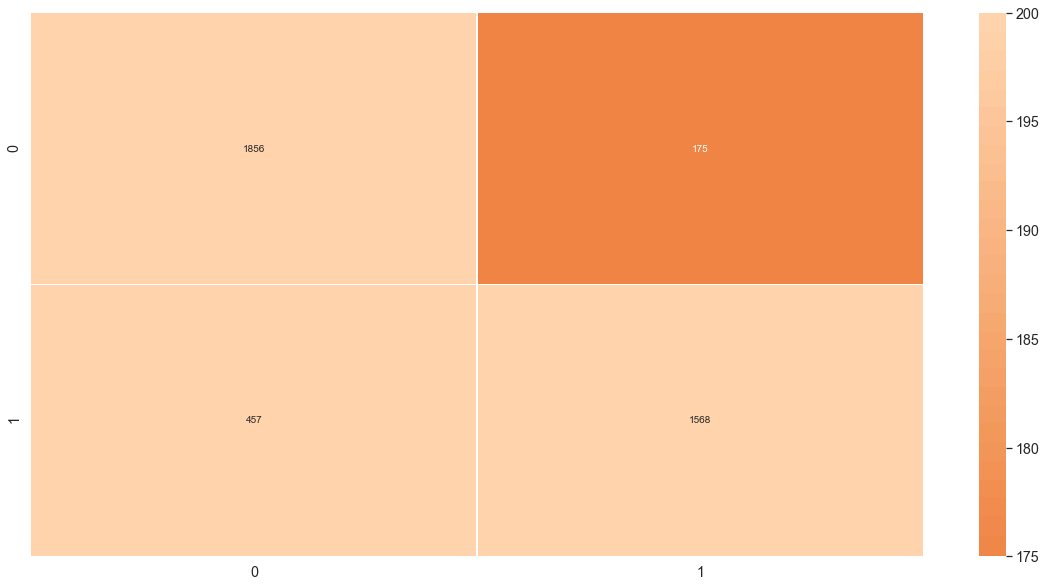

In [50]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(cf, annot=True, fmt="d",linewidths=.5, center = 90, vmax = 200)

In [58]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "red)

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

SyntaxError: EOL while scanning string literal (<ipython-input-58-950a22eef640>, line 27)

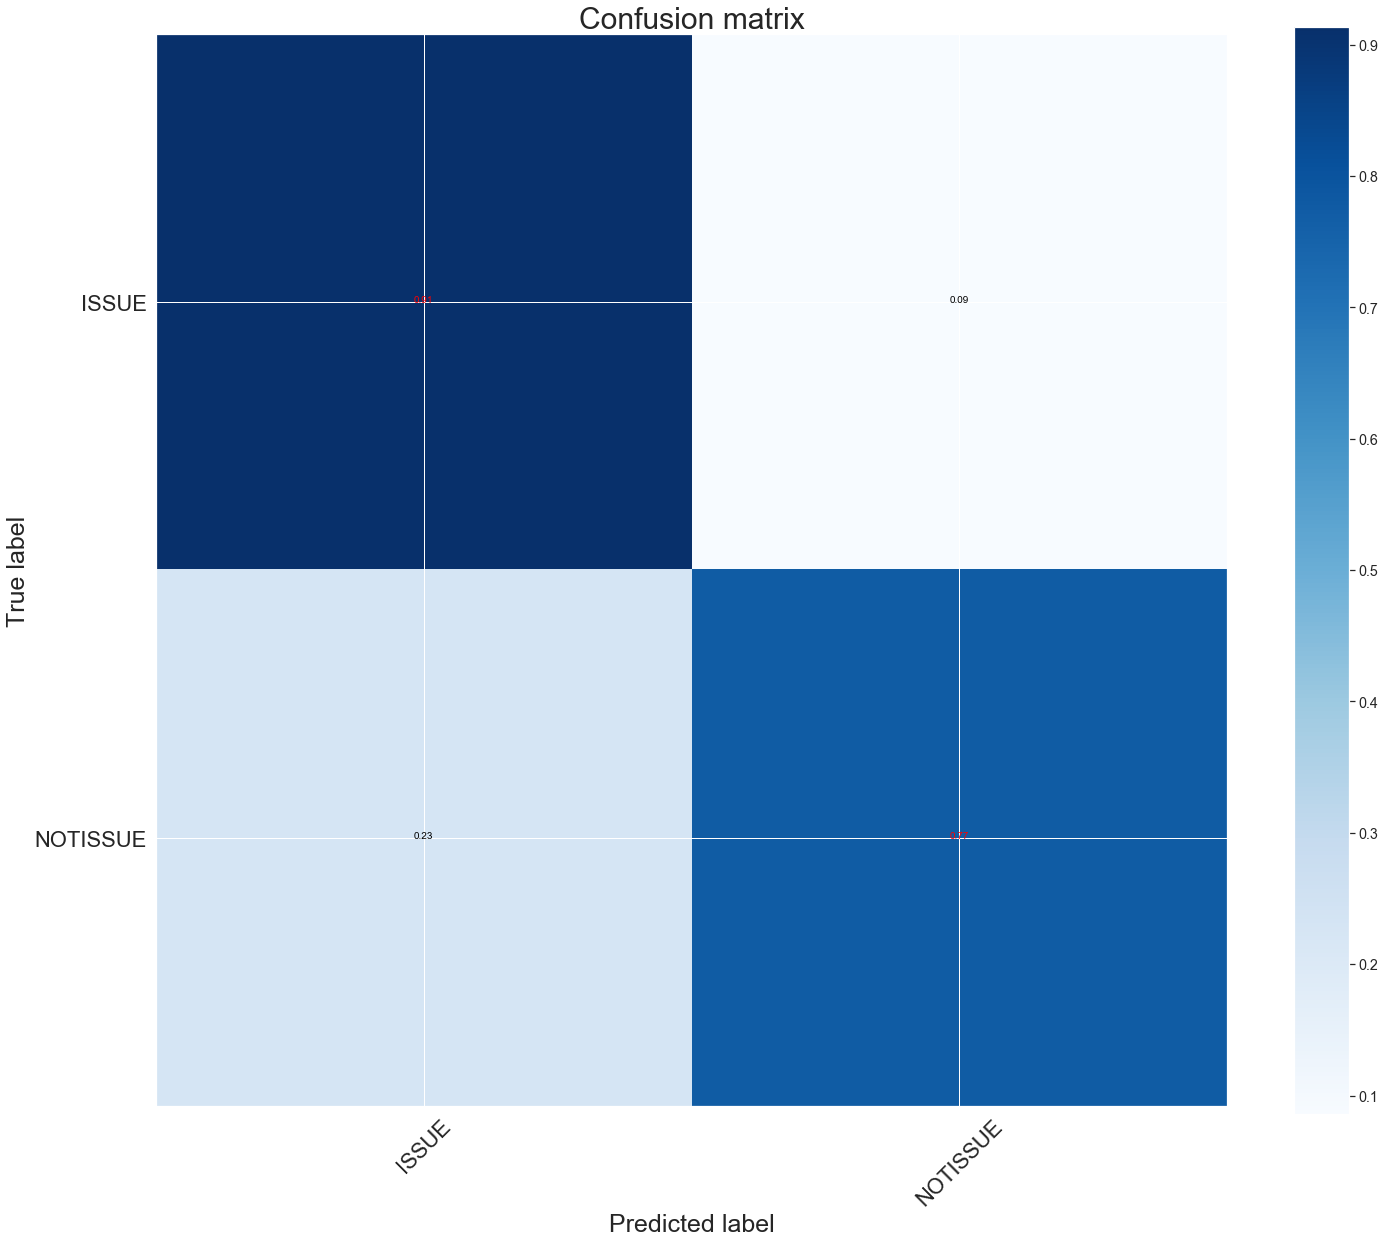

In [59]:
cnf_matrix = confusion_matrix(df.label, data_predict.label)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=['ISSUE','NOTISSUE'], title="Confusion matrix")
plt.show()

In [53]:
from sklearn.metrics import classification_report, accuracy_score

print('accuracy %s' % accuracy_score(data_predict.label, df.label))
print(classification_report(df.label, data_predict.label,target_names=['ISSUE','NOTISSUE']))

accuracy 0.8441814595660749
              precision    recall  f1-score   support

       ISSUE       0.80      0.91      0.85      2031
    NOTISSUE       0.90      0.77      0.83      2025

   micro avg       0.84      0.84      0.84      4056
   macro avg       0.85      0.84      0.84      4056
weighted avg       0.85      0.84      0.84      4056



In [54]:
def false_pos_neg(input_file,output_file,falses_file):
    diff= pd.DataFrame(columns=['true_label','pred_label', 'Text'])
    data = pd.read_csv(input_file,delimiter=',')
    data_pred = pd.read_csv(output_file,delimiter=';')
    t_labels = data.label
    p_labels = data_pred.label
    
    label=data.text.values
    t_label = t_labels.values
    p_label = p_labels.values
    for i in range(len(t_label)):
        if t_label[i]!=p_label[i]:
            diff = diff.append({'true_label':t_label[i],'pred_label':p_label[i], 'Text':label[i]},ignore_index=True)
    diff.to_csv(falses_file,sep=';')
    return diff

In [55]:
falses_file='Data/false_pred_glove300_with_text_preprocessing_v5.csv'
diff=false_pos_neg(input_file,output_file,falses_file)
print(diff)

    true_label pred_label                                               Text
0     NOTISSUE      ISSUE  have order data cable get well finish work pro...
1     NOTISSUE      ISSUE                                     not be happier
2     NOTISSUE      ISSUE                    look headset long time have get
3     NOTISSUE      ISSUE                                       exactly want
4        ISSUE   NOTISSUE  picture resolution far comparably price phone ...
5     NOTISSUE      ISSUE                                     prompt service
6     NOTISSUE      ISSUE                                     please headset
7     NOTISSUE      ISSUE                               be look new earpiece
8     NOTISSUE      ISSUE       be look new earpiece jawbone era awesome too
9     NOTISSUE      ISSUE               phone have have have be cheaply make
10    NOTISSUE      ISSUE  sanyo have survive dozen drop blackton ill effect
11    NOTISSUE      ISSUE               find cell phone right away enter car